In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
df = pd.read_csv("tcs.csv")

In [29]:
# Create binary target: 1 if Close > Open, else 0
df['Target'] = (df['Tata Close'] > df['Tata Open']).astype(int)

# Feature selection
features = ['Tata Open', 'Tata High', 'Tata Low', 'Tata Volume']
X = df[features]
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)


In [33]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


In [35]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[80 52]
 [31 85]]


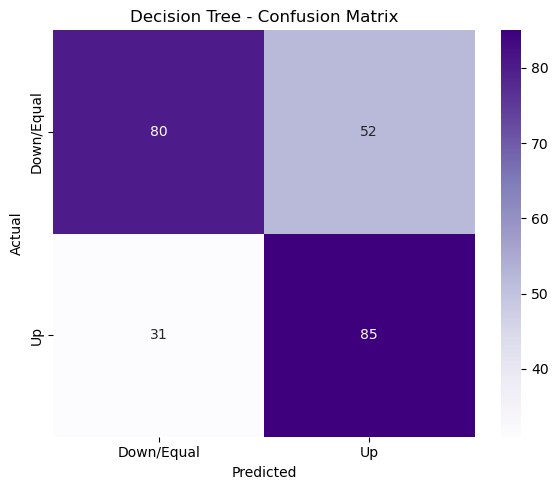

In [37]:

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Down/Equal', 'Up'],
            yticklabels=['Down/Equal', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.tight_layout()
plt.show()

In [39]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       132
           1       0.62      0.73      0.67       116

    accuracy                           0.67       248
   macro avg       0.67      0.67      0.67       248
weighted avg       0.67      0.67      0.66       248



In [45]:
# Visualize the decision tree structure
plt.figure(figsize=(20, 20))
plot_tree(dt_model, feature_names=features, class_names=['Down/Equal', 'Up'], filled=True)
plt.title("Decision Tree Structure")
plt.show()


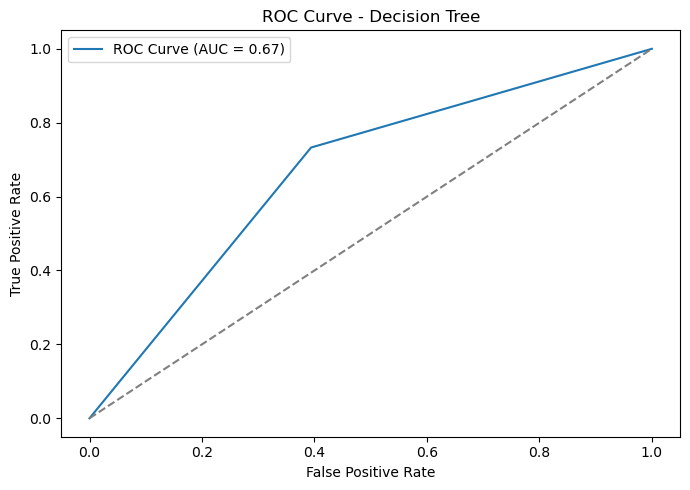

In [47]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = dt_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()


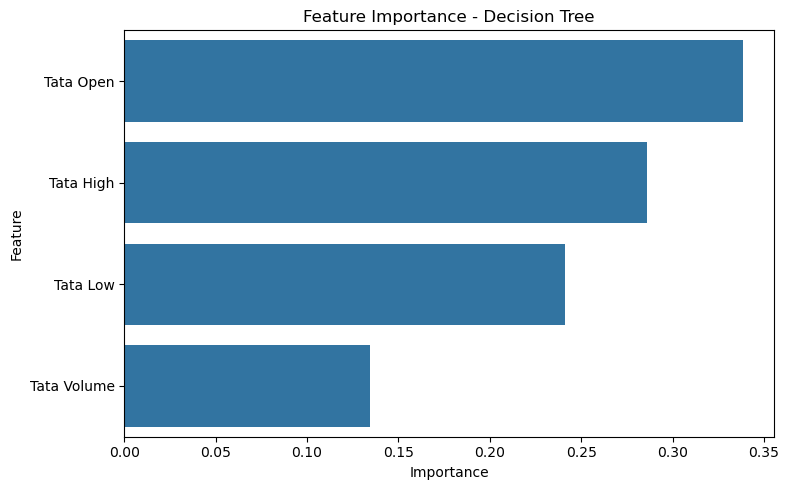

In [49]:
# Feature importances
importances = dt_model.feature_importances_

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


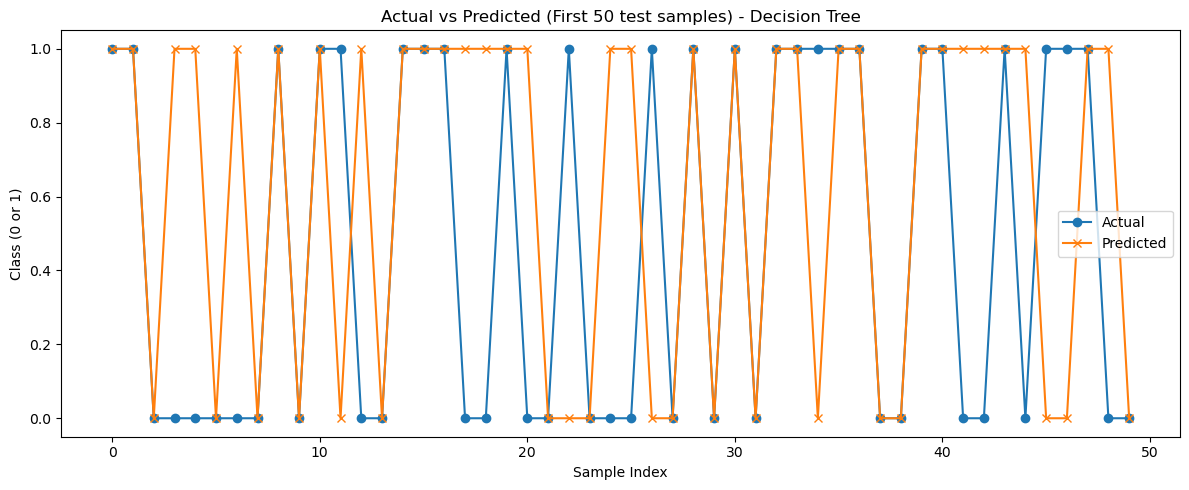

In [51]:
# Combine and plot predictions vs actuals
df_results = X_test.copy()
df_results['Actual'] = y_test.values
df_results['Predicted'] = y_pred

# Plot trend for a slice
plt.figure(figsize=(12, 5))
plt.plot(df_results['Actual'].values[:50], label='Actual', marker='o')
plt.plot(df_results['Predicted'].values[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted (First 50 test samples) - Decision Tree')
plt.xlabel('Sample Index')
plt.ylabel('Class (0 or 1)')
plt.legend()
plt.tight_layout()
plt.show()
